<a href="https://colab.research.google.com/github/nataliaJanasiewicz/MIW/blob/main/projekt5/gr12c_s22847_p5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import preprocessing
from keras.utils import to_categorical

**Proszę nie używać dostępnych bibliotek sieci neuronowych. Do implementacji sieci proszę użyć macierzy stosując bibliotekę numpy.**

#1. Wczytaj pełny zbiór danych iris. Zaproponuj i zrealizuj podział tych danych na dane treningowe i dane testowe oraz przeprowadź na nich normalizacje,

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
y=to_categorical(y)

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

#normalizacja L2 - suma kwadratow jest mniejsza niz 1 
norm=np.linalg.norm(y)
y/=norm

#y = preprocessing.normalize(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(np.shape(X))
print(np.shape(y))

print("X")
print(np.shape(X_train))
print(np.shape(X_test))

print("y")
print(np.shape(y_train))
print(np.shape(y_test))
#print(y)

(150, 4)
(150, 3)
X
(105, 4)
(45, 4)
y
(105, 3)
(45, 3)


#2. Zaproponuj optymalną sieć neuronową klasyfikującą wczytane dane. Użyj nieliniowej funkcji aktywacji w warstwie ukrytej (np. tanh lub sigmoidalna). Stosując propagację wsteczną błędu, wytrenuj sieć metodą wsadową.

In [ ]:
class Sigmoid():
  def acti(self, s):
    return 1 / (1 + np.exp(-s))
  def der(self, x):
    a = self.acti(x)
    return a * (1 - a)

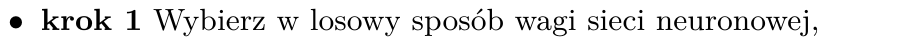

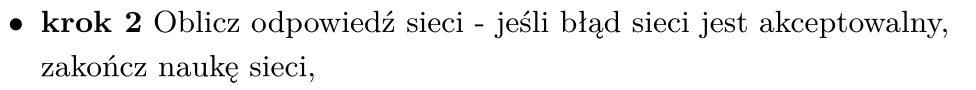

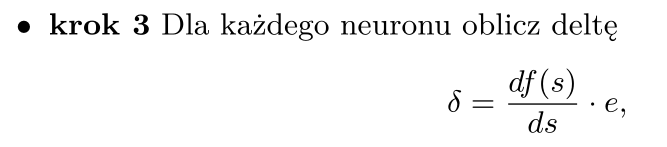

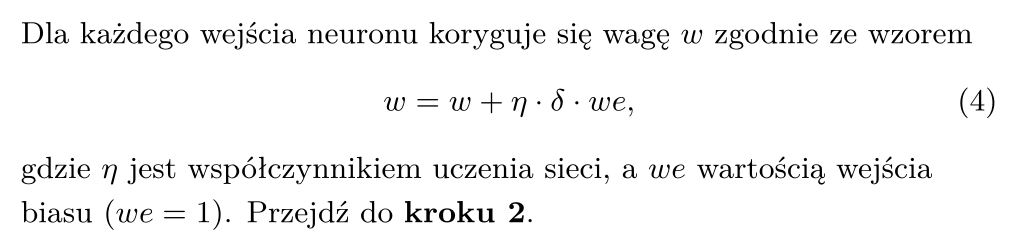

In [ ]:
class Neuron():
  #input - ilosc wejsc
  #acti - funckja aktywacji
  #eta - stała uczenia 
  def __init__(self, input, acti, eta):
    self.W = np.random.uniform(-1, 1, size=(input,)) # krok 1: losowe wagi z przedziału [-1, 1]
    self.bias = np.random.uniform(-1, 1) # krok 1: losowy bias z przedziału [-1, 1]
    self.acti=acti
    self.eta=eta

  #zwraca wyjście neuronu po zastosowaniu funkcji aktywacji na liniowej kombinacji wejść i wag oraz biasu
  def predict(self, x): 
    y=self.W*x #iloczyn skalarny wejść i wag
    y=sum(y)
    y+=self.bias #dodajemy bias
    self.last_s=y #zapisujemy ostatnią liniową kombinację wejść i wag
    return self.acti.acti(y) #zwracamy wynik po zastosowaniu funkcji aktywacji

  def fit(self, e):
    e_p=self.W*e #Obliczamy nowy błąd "e_p" poprzez pomnożenie wag przez błąd "e"
    d=self.acti.der(self.last_s)*e #krok 3: pochodna funkcji aktywacji = delta
    #Aktualizujemy wagi i bias poprzez dodanie ich gradientu pomnożonego przez stałą uczenia
    self.W=self.W+self.eta*d
    self.bias=self.bias+self.eta*d
    return e_p

W przypadku warstw ukrytych błąd dla neuronu liczy się jako suma iloczynów wagi łączącej z kolejną warstwą i błędem danego neuronu kolejnej warstwy, ważne żeby wagi z kolejnej warstwy pobrać przed ich modyfikacją. W przypadku warstwy wyjściowej błąd liczymy bezpośrednio

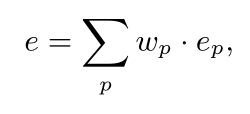

In [ ]:
#warstwa neuronów w sieci neuronowej
#input - liczba wejść dla każdego neuronu w warstwie
#output - liczba neuronów w warstwie
class Layer():
  def __init__(self, input, output, acti, eta):
    self.neurons=[] #lista neuronów, po dodaniu neuronów ma długość output
    self.input=input
    for i in range(output):
      self.neurons.append(Neuron(input, acti, eta))

#Wyjście jest listą wartości zwróconych przez każdy neuron w warstwie dla wejścia x
  def predict(self, x):
    y=[]
    for n in self.neurons:
      y.append(n.predict(x))
    return y

  def fit(self, e):
    e_p=np.zeros(self.input) #wektor
    for i, n in enumerate(self.neurons):
      e_p_one = n.fit(e[i])
      e_p+=e_p_one #Zwrócony błąd jest dodawany do wektora e_p
    return e_p

In [ ]:
#siec neuronowa 
class NeuronNetwork():
  def __init__(self, layers, acti, eta):
    self.layers=[]
    #Wejścia x są kopiowane, a następnie są przeprowadzane przez każdą warstwę z osobna. 
    #Wynik z każdej warstwy jest przekazywany do następnej warstwy, aż do warstwy wyjściowej.
    for i in range(1, len(layers)):
      #layers[i-1] - neurony na wejsciu i 
      #layers[i] - neurony na wyjsciu
      self.layers.append(Layer(layers[i-1], layers[i], acti, eta))
  
  def predict(self, x):
    x_in=x.copy()
    #Wynik z każdej warstwy jest przekazywany do następnej warstwy, aż do warstwy wyjściowej
    for l in self.layers:
      x_in=l.predict(x_in)
    return x_in

  def fit(self, e):
    layers_reverse = self.layers.copy()
    #Najpierw metoda ta odwraca kolejność warstw sieci 
    layers_reverse.reverse()
    #dla każdej z warstw wywołuje metodę fit()
    for l in layers_reverse:
      e = l.fit(e)

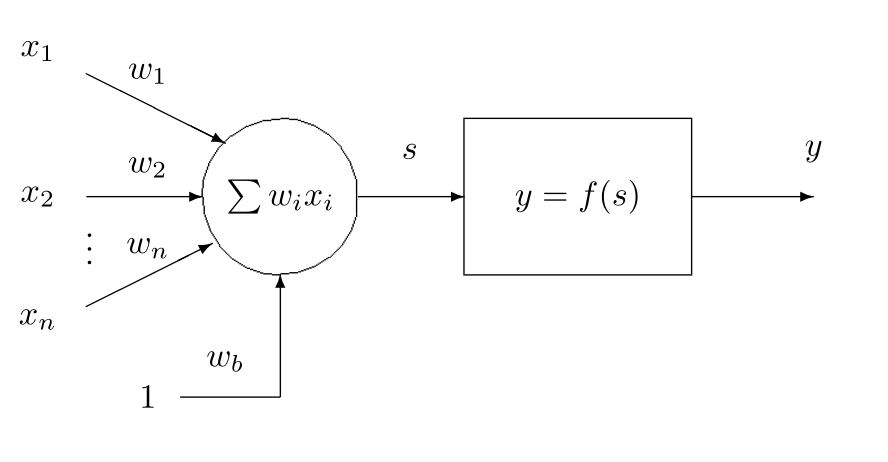

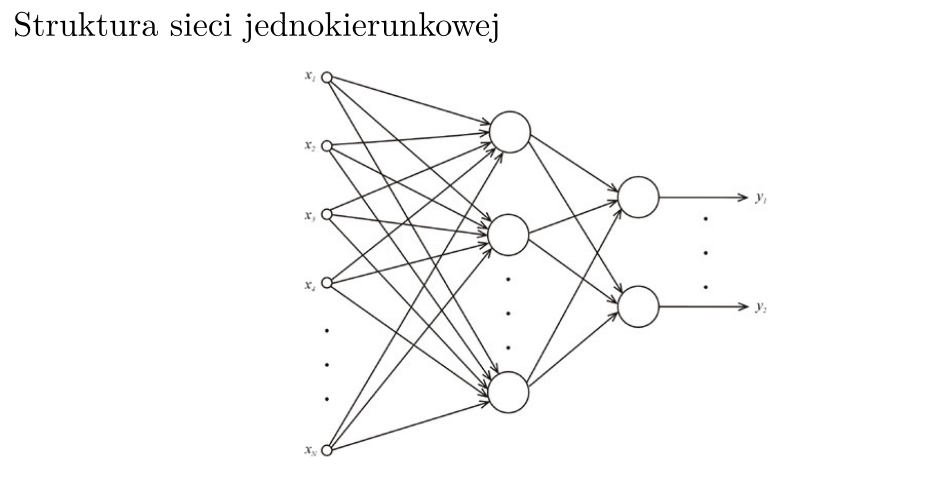

In [ ]:

#treniwanie danych x i y na sieci neuronowej (neuron network)
def batch(NN, epoch=100):
  accuracy=[]
  loss=[]
  for i in range(epoch):
    e=0
    a=0
    for xe, ye in zip(X, y):
      p = NN.predict(xe) # predykcja dla danych 
      e+=(ye-p) # blad, przewidywana etykieta p a prawdziwa etykieta yp 
      if np.argmax(p) == np.argmax(ye): #jeśli indeks klasy o najwyższym prawdopodobieństwie predykcji = rzeczywistej klasie
        a+=1
    e/=len(X) #normalizacja e
    NN.fit(e) #aktyalizacja wag
    loss.append(e) #dodajemy blad do listy 
    #iczba poprawnie sklasyfikowanych przykładów podzielona przez całkowitą liczbę przykładów
    accuracy.append(a/len(y)) #a -> poprawnie sklasyfikowane 

  #Pierwszy wykres przedstawia dokładność klasyfikacji w kolejnych epokach
  plt.plot(accuracy)
  plt.ylabel('accuracy')
  plt.show()
  plt.plot(np.array(loss)[:,0], label='class 0')
  plt.plot(np.array(loss)[:,1], label='class 1')
  plt.plot(np.array(loss)[:,2], label='class 2')
  #drugi wykres przedstawia wartość funkcji straty dla każdej z klas w kolejnych epokach
  plt.ylabel('loss')
  plt.legend()
  plt.show()



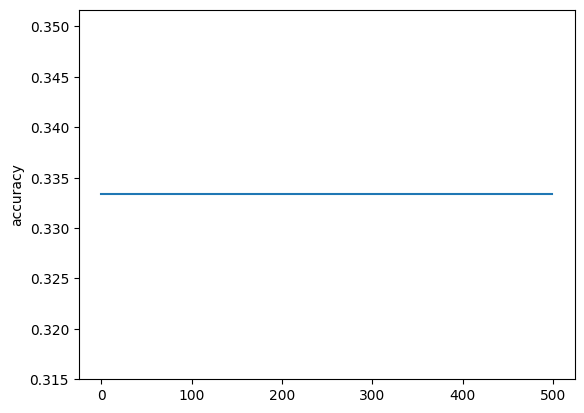

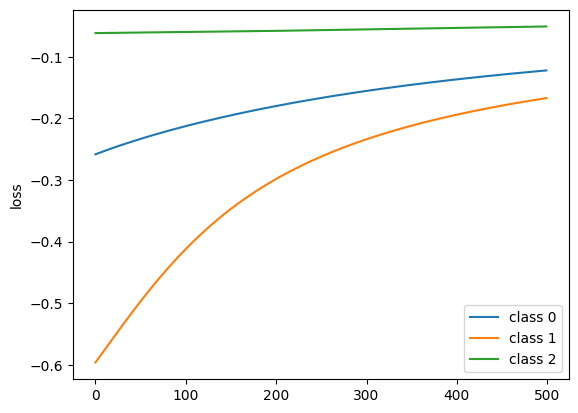

In [ ]:
#4 neurony
#wartswa ukryta ma 10 nauronow
#warstwa wyjsciowa ma 3 neurony ( bo 3 klasy )
NN = NeuronNetwork([4, 10, 3], Sigmoid(), 0.01)
batch(NN, 500)

In [ ]:
y_pred = NN.predict(X_test.T)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(np.argmax(y_test.T, axis=1), y_pred_classes)


ValueError: ignored

In [ ]:
from sklearn.metrics import accuracy_score

# zakładając, że mamy już wytrenowany model NN oraz dane testowe X_test i etykiety testowe y_test
y_pred = NN.predict(X_test)  # prognozowanie etykiet dla danych testowych
y_pred_classes = np.argmax(y_pred, axis=1)  # wybieranie klasy z najwyższym prawdopodobieństwem
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes)  # obliczanie dokładności
print(f"Dokladnosc: {accuracy}")  # wyświetlanie wyniku


ValueError: ignored

#3. Zwróć w postaci wykresu informacje o zmianie dokładności i straty w trakcie uczenia. Czyli zapisz i pokaż, jaki był wyliczany błąd oraz jaka była dokładność w każdej epoce. Przy której epoce dalsza nauka nie miała już sensu?

#4. Zmień sposób podawania sieci z wsadowej na on line. Wytrenuj sieć. Oceń działanie sieci.

rozica miedzy batch a online w przypadku uczenia online, aktualizacja wag następuje dla każdego przykładu treningowego osobno, natomiast w uczeniu batch, aktualizacja następuje po obliczeniu sumy błędów dla całego zbioru treningowego.

In [ ]:
def online(NN, epoch=100):
  accuracy=[]
  loss=[]
  for i in range(epoch):
    a=0
    loss_e=0
    for xe, ye in zip(X_train, y_train):
      p = NN.predict(xe)
      e=ye-p
      loss_e+=e
      NN.fit(e)
      if np.argmax(p) == np.argmax(ye):
        a+=1

    accuracy.append(a/len(y_train))
    loss.append(loss_e)
  plt.plot(accuracy)
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()
  plt.plot(np.array(loss)[:,0], label='class 0')
  plt.plot(np.array(loss)[:,1], label='class 1')
  plt.plot(np.array(loss)[:,2], label='class 2')
  plt.ylabel('loss')
  plt.legend()
  plt.show()


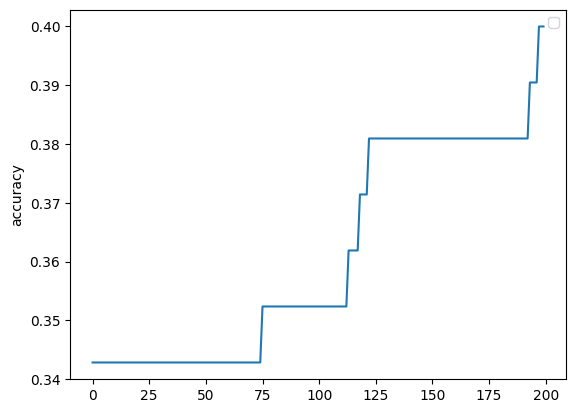

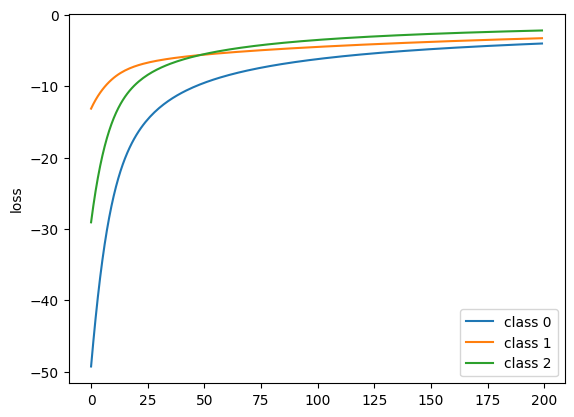

In [ ]:
online(NeuronNetwork([4, 10, 3], Sigmoid(), 0.001), 200)

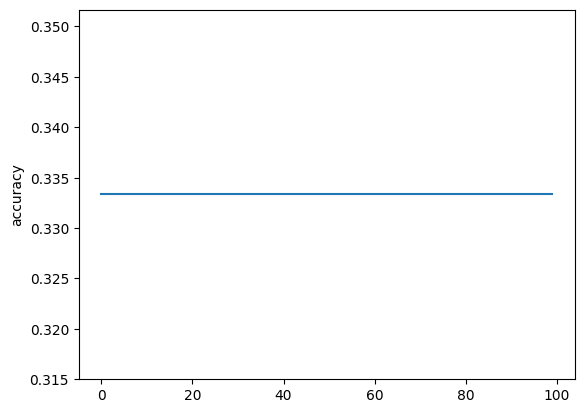

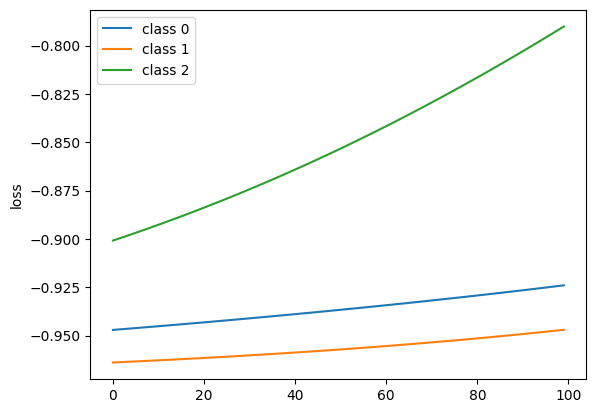

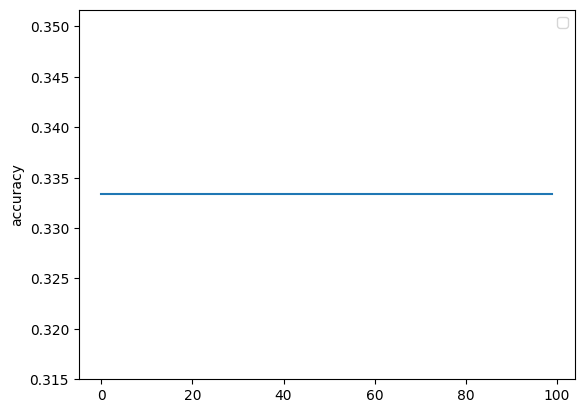

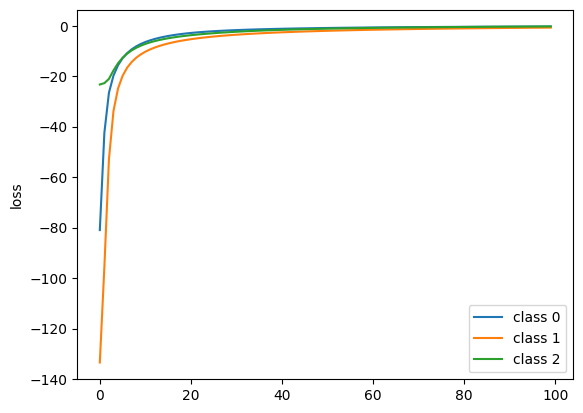

In [ ]:
batch(NeuronNetwork([4, 10, 20, 50, 3], Sigmoid(), 0.001),200)
online(NeuronNetwork([4, 10, 20, 50, 3], Sigmoid(), 0.001),200)

#5. Przetestuj sieć na innych funkcjach aktywacji.

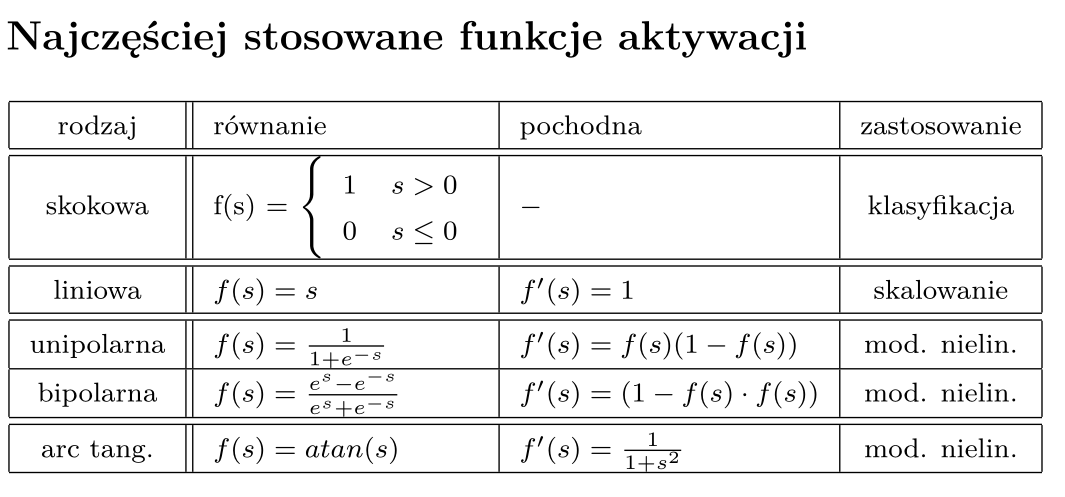

##funkcja skokowa

In [ ]:
class Step():
  def acti(self, s):
    if s >= 0:
      return 1
    else:
      return 0
  def der(self, x):
    return 0

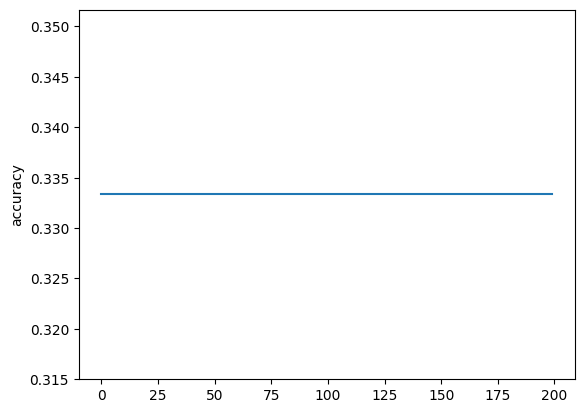

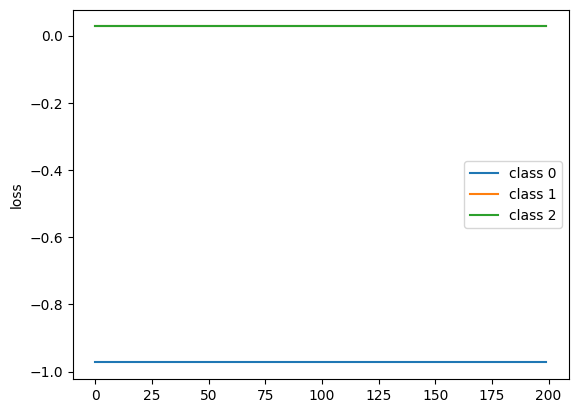

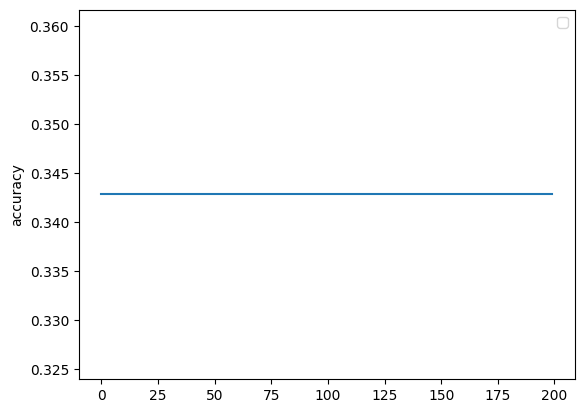

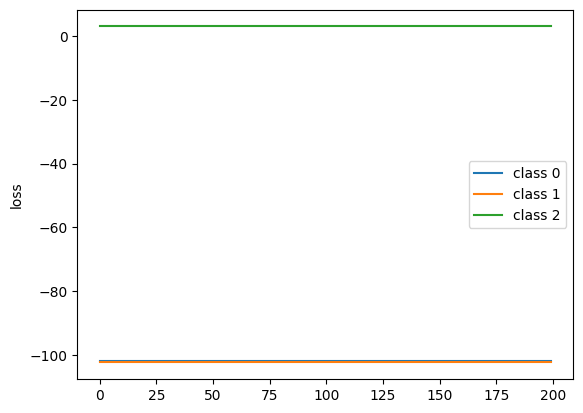

In [ ]:
batch(NeuronNetwork([4, 10, 20, 50, 3], Step(), 0.001),200)
online(NeuronNetwork([4, 10, 20, 50, 3], Step(), 0.001),200)

##funkcja liniowa

In [ ]:
class Linear():
  def acti(self, s):
    return s
  def der(self, x):
    return 1

<ipython-input-51-b8361a7700ab>:16: RuntimeWarning: overflow encountered in multiply
  e_p=self.W*e
<ipython-input-51-b8361a7700ab>:11: RuntimeWarning: invalid value encountered in double_scalars
  y+=self.Wb


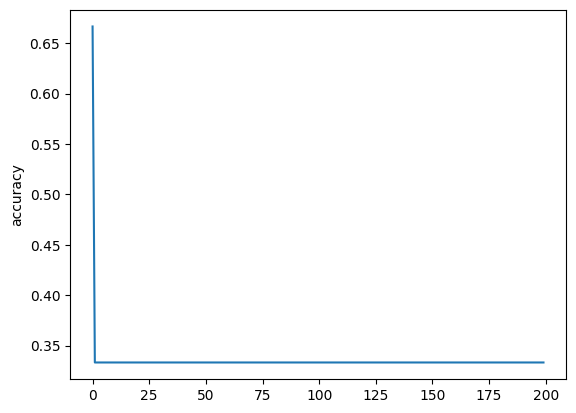

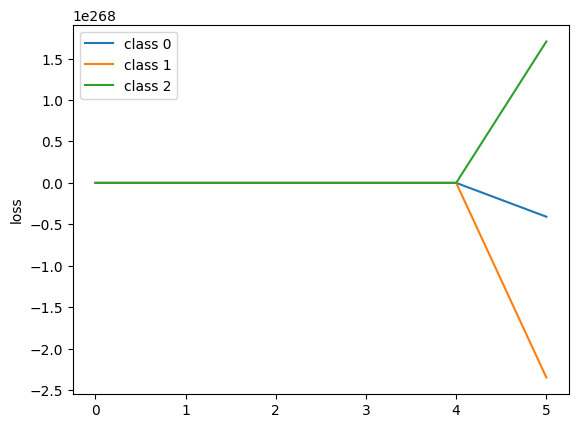

<ipython-input-51-b8361a7700ab>:9: RuntimeWarning: overflow encountered in multiply
  y=self.W*x


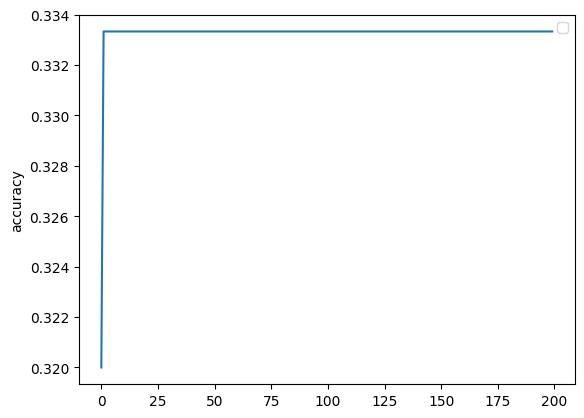

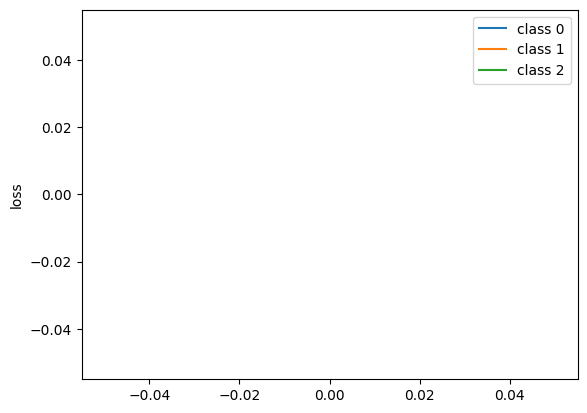

In [ ]:
batch(NeuronNetwork([4, 10, 20, 50, 3], Linear(), 0.001),200)
online(NeuronNetwork([4, 10, 20, 50, 3], Linear(), 0.001),200)

##funkcja unipolarna

In [ ]:
class Unipolar():
  def acti(self, s):
    return (1 + np.exp(-s)) ** (-1)
  def der(self, x):
    a = self.acti(x)
    return a * (1 - a)

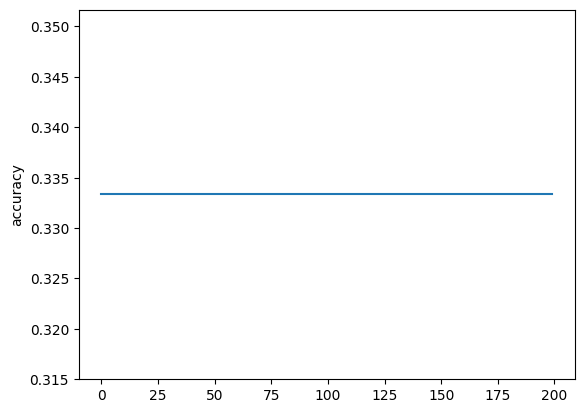

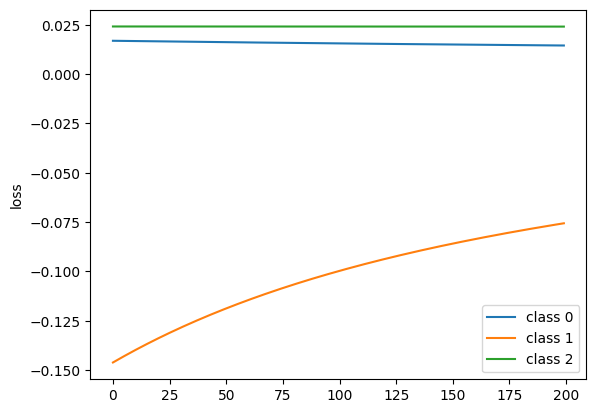

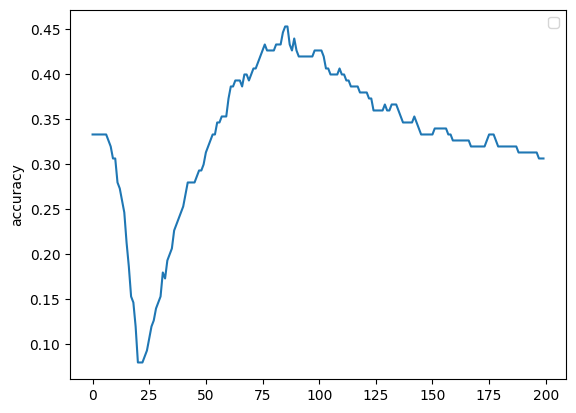

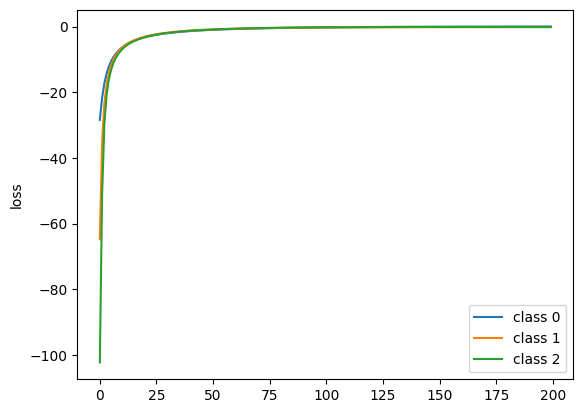

In [ ]:
batch(NeuronNetwork([4, 10, 20, 50, 3], Unipolar(), 0.001),200)
online(NeuronNetwork([4, 10, 20, 50, 3], Unipolar(), 0.001),200)

##funkcja bipolarna

In [ ]:
class Bipolar():
  def acti(self, s):
    return (1 - np.exp(-s)) / (1 + np.exp(-s))
  def der(self, x):
    a = self.acti(x)
    return 0.5 * (1 + a) * (1 - a)

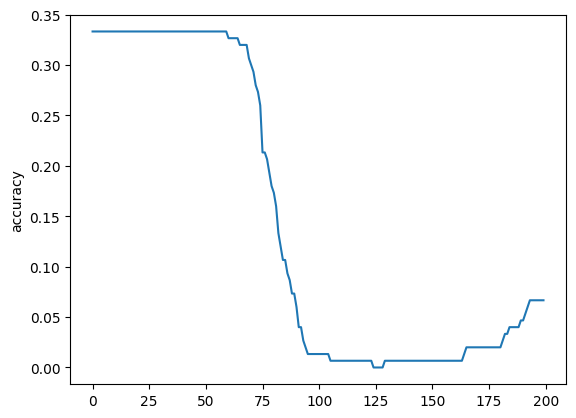

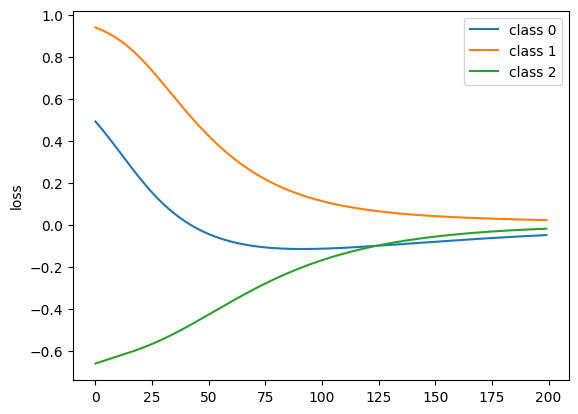

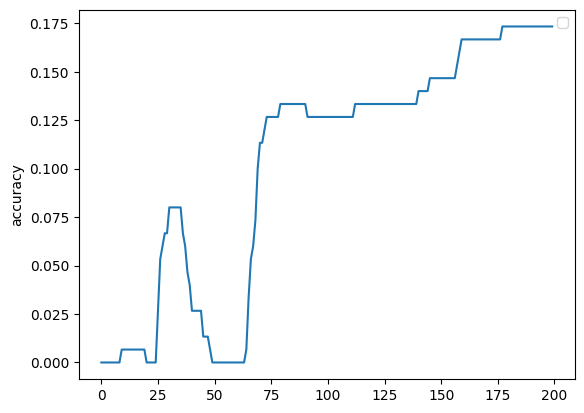

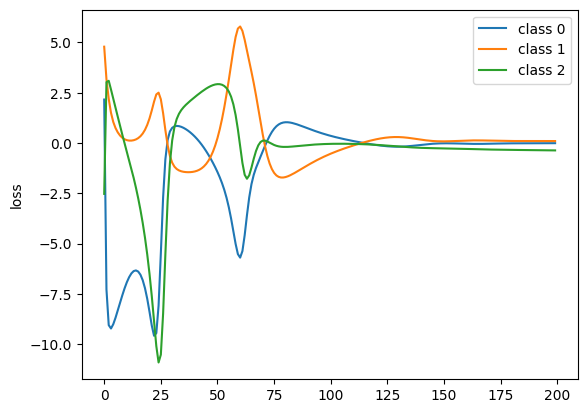

In [ ]:
batch(NeuronNetwork([4, 10, 20, 50, 3], Bipolar(), 0.001),200)
online(NeuronNetwork([4, 10, 20, 50, 3], Bipolar(), 0.001),200)

##funkcja arc tang

In [ ]:
class Arctan():
  def acti(self, s):
    return np.arctan(s)
  def der(self, x):
    return 1 / (1 + x**2)

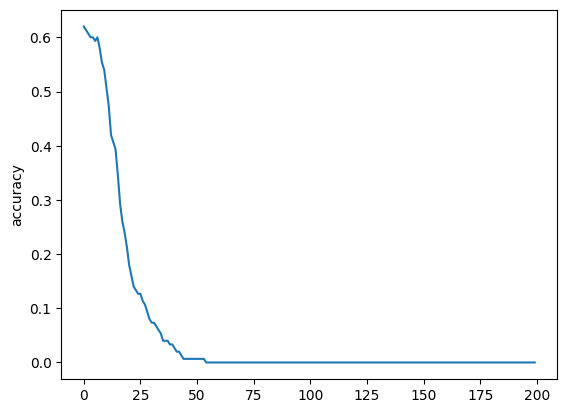

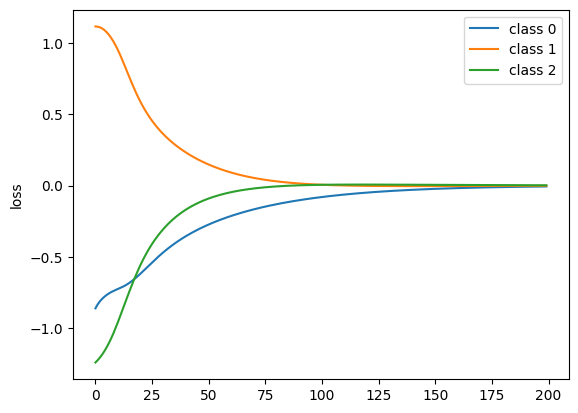

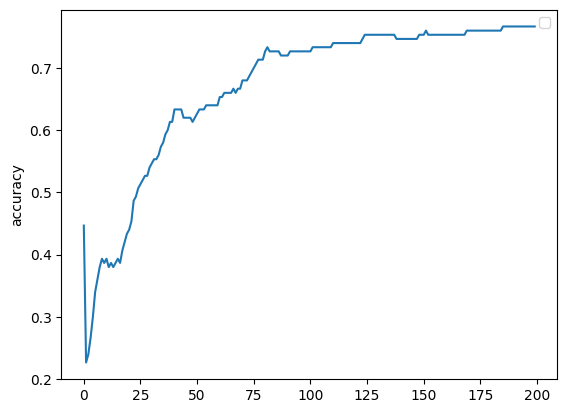

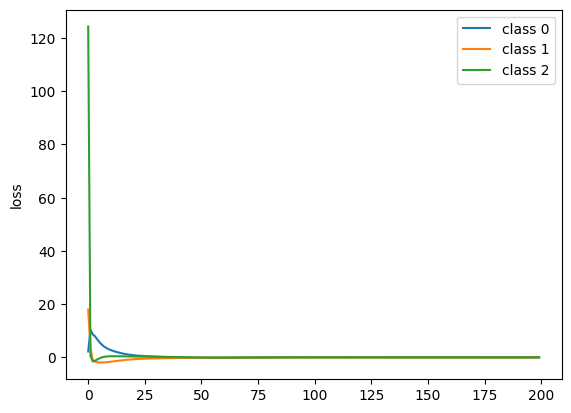

In [ ]:
batch(NeuronNetwork([4, 10, 20, 50, 3], Arctan(), 0.001),200)
online(NeuronNetwork([4, 10, 20, 50, 3], Arctan(), 0.001),200)

##funkcja tanh

In [ ]:
class Tanh():
  def acti(self, s):
    return np.tanh(s)
  def der(self, x):
    return 1 - np.tanh(x)**2

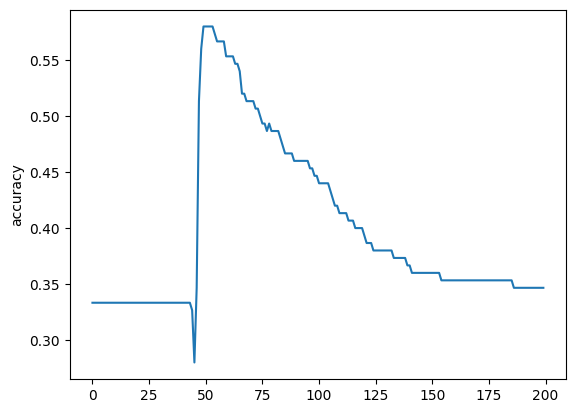

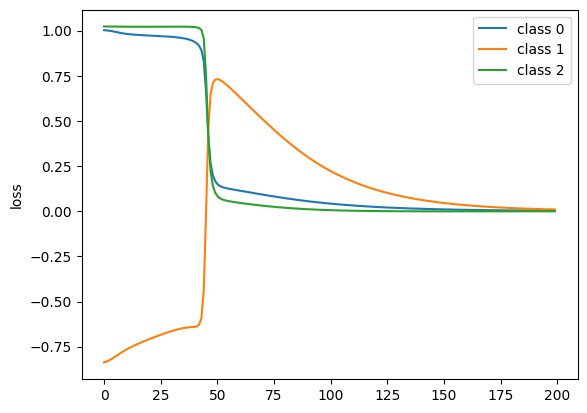

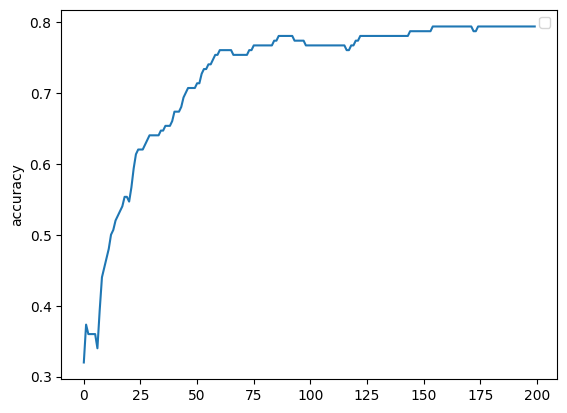

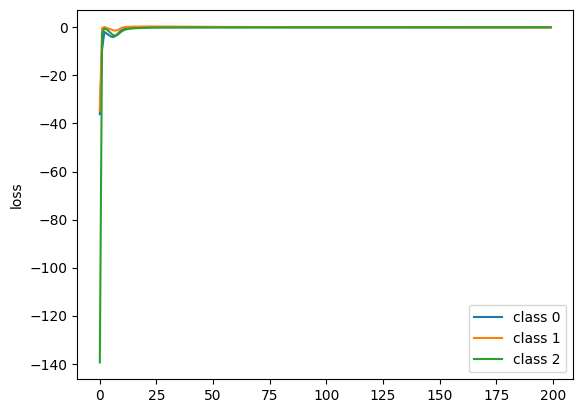

In [ ]:
batch(NeuronNetwork([4, 10, 20, 50, 3], Tanh(), 0.001),200)
online(NeuronNetwork([4, 10, 20, 50, 3], Tanh(), 0.001),200)